In [29]:
from scipy.io import wavfile
from scipy import fft
import numpy as np
from matplotlib import pyplot as plt
import pylab
import math as m
from tqdm import tqdm
from time import sleep

In [6]:
def normalize(data):
    abs_data = map(abs,data)
    max_value = max(abs_data)
    data = data/max_value
    return data

In [7]:
def display_fft(sample, fs):
    '''returns and shows in plot amplitude and phase'''
    transform = fft(sample)
    transform_half = np.array([])
    transform_half = transform[0:int(len(transform)/2)]
    amp = np.abs(transform_half)
    phase = np.angle(transform_half)
    
    size = int(len(transform_half))
    freq_ratio = fs/(2*size)
    freq_base = np.array([])
    for i in range(size):
        freq_base = np.append(freq_base, i*freq_ratio)
        
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    line = ax.plot(freq_base, amp)
    ax.set_xscale('log')
    plt.show()
#     plt.plot(freq_base, amp)
#     plt.show()
    
    plt.plot(freq_base, phase)
    plt.show()

    return amp, phase, freq_ratio

In [8]:
sample_read = np.array([])
fs, sample_read = wavfile.read('piano1.wav')

c:\users\wiktor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


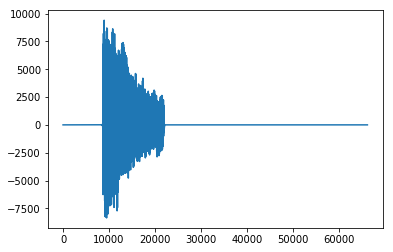

In [9]:
plt.plot(sample_read)
plt.show()

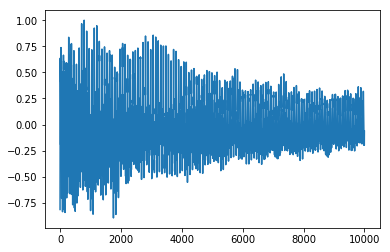

In [10]:
sample = np.array([])
for i in range(10000, 20000): #time interval depending on audio signal
    sample = np.append(sample, sample_read[i])

sample = normalize(sample)
plt.plot(sample)
plt.show()

In [11]:
wavfile.write('sample_cut.wav', fs, sample)

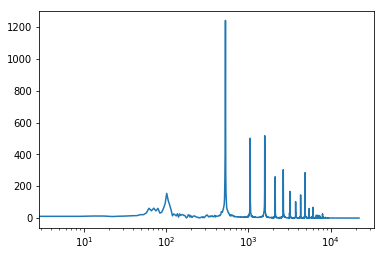

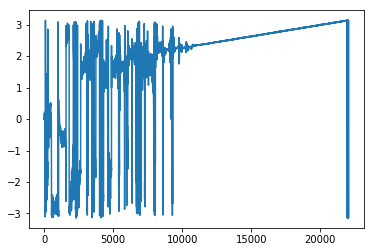

In [12]:
amp, phase, freq_ratio = display_fft(sample, fs)

In [13]:
max_amp_index = np.argmax(amp)
print(max_amp_index)

base_freq = max_amp_index*freq_ratio
print(base_freq)

119
524.79


c:\users\wiktor\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


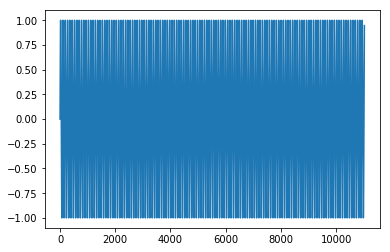

In [14]:
rec_signal = np.array([])
T = 1/4
t = np.linspace(0, T, T*fs)
rec_signal = np.sin(2*m.pi*base_freq*t)

plt.plot(rec_signal)
plt.show()

In [15]:
wavfile.write('rec_freq.wav', fs, rec_signal)

In [16]:
"""MODEL OBWIEDNI"""

'MODEL OBWIEDNI'

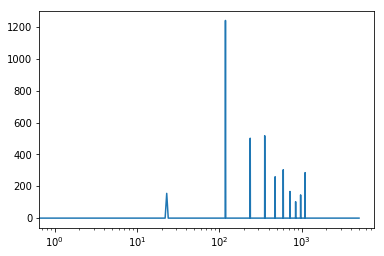

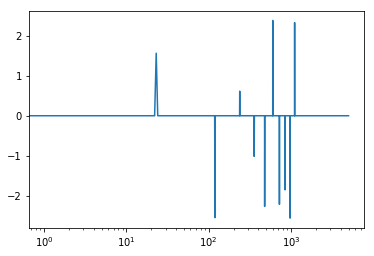

In [19]:
amp_model = np.array([])
phase_model = np.array([])
for i in range(len(amp)):
    if amp[i] > 100 and amp[i-1] < amp[i] and amp[i+1] < amp[i]:
        amp_model = np.append(amp_model, amp[i])
        phase_model = np.append(phase_model, phase[i])
    else:
        amp_model = np.append(amp_model, 0.0)
        phase_model = np.append(phase_model, 0.0)
    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line = ax.plot(amp_model)
ax.set_xscale('log')
plt.show()

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
line1 = ax1.plot(phase_model)
ax1.set_xscale('log')
plt.show()

In [37]:
signal_harmonics = np.array([])
freq_array = np.array([])
amp_array = np.array([])
phase_array = np.array([])
for i in tqdm(range(len(amp_model)), total=len(amp), position=0, desc='Super progressbar | wishlist items', unit='awesomeness'):
    if amp_model[i] > 0:
        print(i*freq_ratio, end = "      ")
        freq_array = np.append(freq_array, i*freq_ratio)
        print(amp_model[i], end = "      ")
        amp_array = np.append(amp_array, amp_model[i])
        print(phase_model[i])
        phase_array = np.append(phase_array, phase_model[i])
        sleep(0.01)
freq_array = freq_array # * p - frequency modulation available (where p - interval ratio)
print(amp_array)

Super progressbar | wishlist items:   0%|                                            | 0/5000 [00:00<?, ?awesomeness/s]

101.43      155.30735534397786      1.5665729238392898
524.79      1240.5728077534584      -2.5532847165338337
1049.58      501.3689380779072      0.615291941934191
1574.3700000000001      517.0241894017465      -1.0189995772984282
2107.98      259.50410693494166      -2.2717869291811263


Super progressbar | wishlist items:  10%|███                             | 479/5000 [00:00<00:00, 4775.96awesomeness/s]

2646.0      303.7032750954256      2.3875374610648703
3188.4300000000003      167.19086360212964      -2.2188247875884177
3739.6800000000003      102.92739099215804      -1.8558769498525458
4299.75      145.70785948514327      -2.5648348454659766
4877.46      285.46941170539316      2.3330406894510762


Super progressbar | wishlist items: 100%|██████████████████████████████| 5000/5000 [00:00<00:00, 20810.18awesomeness/s]


[ 155.30735534 1240.57280775  501.36893808  517.0241894   259.50410693
  303.7032751   167.1908636   102.92739099  145.70785949  285.46941171]


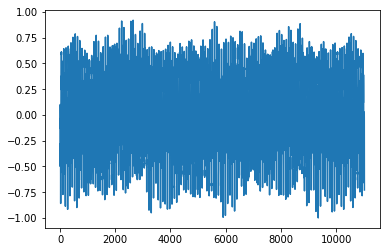

In [38]:
rec_signal = np.array([])
rec_signal = np.zeros(int(T*fs))
for i in range(len(freq_array)):
    tmp_signal = amp_array[i]*np.sin(2*m.pi*freq_array[i]*t + phase_array[i])
    rec_signal = rec_signal + tmp_signal
    for j in range(len(rec_signal)):
        rec_signal[j] = rec_signal[j] + tmp_signal[j]

rec_signal = normalize(rec_signal)
plt.plot(rec_signal)
plt.show()

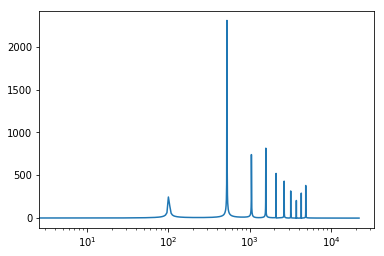

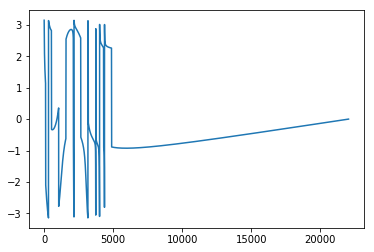

(array([1.12685374, 1.15485075, 1.23609678, ..., 0.28147222, 0.28147215,
        0.2814721 ]),
 array([ 3.14159265e+00,  2.90429767e+00,  2.68469658e+00, ...,
        -9.25116365e-04, -6.60797415e-04, -3.96478450e-04]),
 4.000362844702467)

In [39]:
display_fft(rec_signal, fs)

In [24]:
wavfile.write('output_signal.wav', fs, rec_signal)